# Week 11 Activity

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv('C:\\Users\\USER\\Downloads\\student-data.csv')
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,yes
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,yes
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,no,no,5,5,4,4,5,4,11,no
391,MS,M,17,U,LE3,T,3,1,services,services,...,yes,no,2,4,5,3,4,2,3,yes
392,MS,M,21,R,GT3,T,1,1,other,other,...,no,no,5,5,3,3,3,3,3,no
393,MS,M,18,R,LE3,T,3,2,services,other,...,yes,no,4,4,1,3,4,5,0,yes


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [5]:
data.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
passed        0
dtype: int64

In [6]:
numeric=data.select_dtypes("int64").columns
Categortical=data.select_dtypes(include="object").columns
print("numerica data:",numeric)
print("Categorical data:",Categortical)
numerical_data=data.select_dtypes("int64")

numerica data: Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences'],
      dtype='object')
Categorical data: Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic', 'passed'],
      dtype='object')


# Checking outliers

Text(0, 0.5, 'values')

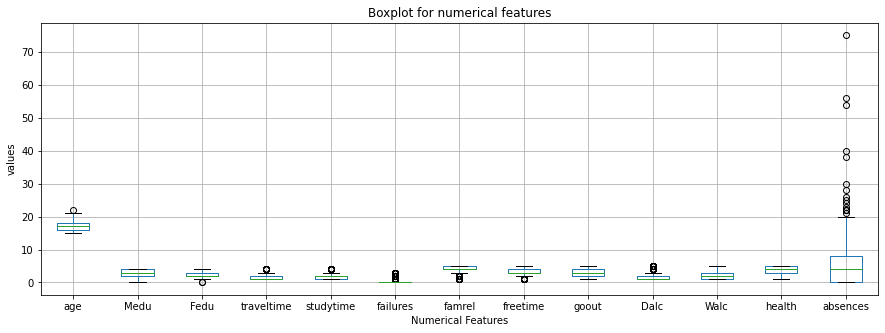

In [7]:
plt.figure(figsize=(15,5))
numerical_data.boxplot()
plt.title("Boxplot for numerical features")
plt.xlabel("Numerical Features")
plt.ylabel("values")

Text(0, 0.5, 'values')

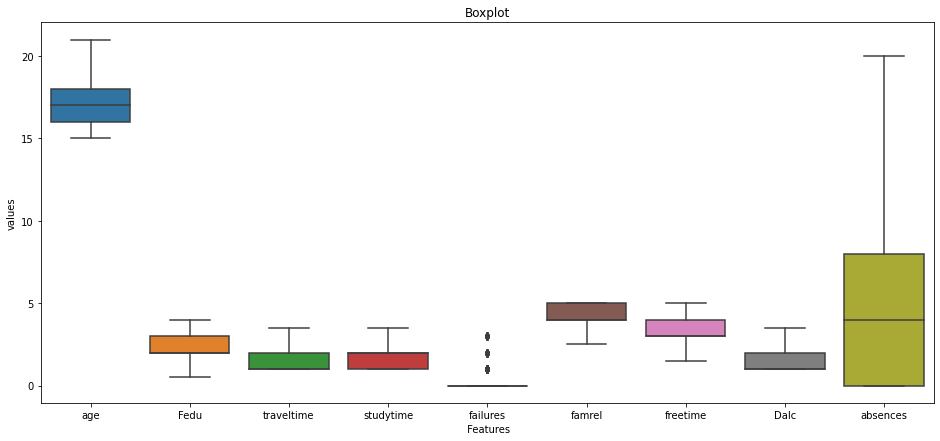

In [11]:
cols=['age', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime','Dalc', 'absences']

#Handling of outliers in absence Field
Q1=np.percentile(data["absences"],25,interpolation="midpoint")
Q2=np.percentile(data["absences"],50,interpolation="midpoint")
Q3=np.percentile(data["absences"],75,interpolation="midpoint")
IQR=Q3-Q1
low_lim=Q1-(1.5*IQR)
up_lim=Q3+(1.5*IQR)
data.loc[data["absences"] <low_lim,"absences"] = low_lim
data.loc[data["absences"] >up_lim,"absences"] = up_lim


#Handling of outliers in famrel Field
Q1=np.percentile(data["famrel"],25,interpolation="midpoint")
Q2=np.percentile(data["famrel"],50,interpolation="midpoint")
Q3=np.percentile(data["famrel"],75,interpolation="midpoint")
IQR=Q3-Q1
low_lim=Q1-(1.5*IQR)
up_lim=Q3+(1.5*IQR)
data.loc[data["famrel"] <low_lim,"famrel"] = low_lim
data.loc[data["famrel"] >up_lim,"famrel"] = up_lim

#Handling of outliers in Fedu Field
Q1=np.percentile(data["Fedu"],25,interpolation="midpoint")
Q2=np.percentile(data["Fedu"],50,interpolation="midpoint")
Q3=np.percentile(data["Fedu"],75,interpolation="midpoint")
IQR=Q3-Q1
low_lim=Q1-(1.5*IQR)
up_lim=Q3+(1.5*IQR)
data.loc[data["Fedu"] <low_lim,"Fedu"] = low_lim
data.loc[data["Fedu"] >up_lim,"Fedu"] = up_lim

#Handling of outliers in traveltime Field
Q1=np.percentile(data["traveltime"],25,interpolation="midpoint")
Q2=np.percentile(data["traveltime"],50,interpolation="midpoint")
Q3=np.percentile(data["traveltime"],75,interpolation="midpoint")
IQR=Q3-Q1
low_lim=Q1-(1.5*IQR)
up_lim=Q3+(1.5*IQR)
data.loc[data["traveltime"] <low_lim,"traveltime"] = low_lim
data.loc[data["traveltime"] >up_lim,"traveltime"] = up_lim

#Handling of outliers in Studytime Field
Q1=np.percentile(data["studytime"],25,interpolation="midpoint")
Q2=np.percentile(data["studytime"],50,interpolation="midpoint")
Q3=np.percentile(data["studytime"],75,interpolation="midpoint")
IQR=Q3-Q1
low_lim=Q1-(1.5*IQR)
up_lim=Q3+(1.5*IQR)
data.loc[data["studytime"] <low_lim,"studytime"] = low_lim
data.loc[data["studytime"] >up_lim,"studytime"] = up_lim

#Handling of outliers in Dalc Field
Q1=np.percentile(data["Dalc"],25,interpolation="midpoint")
Q2=np.percentile(data["Dalc"],50,interpolation="midpoint")
Q3=np.percentile(data["Dalc"],75,interpolation="midpoint")
IQR=Q3-Q1
low_lim=Q1-(1.5*IQR)
up_lim=Q3+(1.5*IQR)
data.loc[data["Dalc"] <low_lim,"Dalc"] = low_lim
data.loc[data["Dalc"] >up_lim,"Dalc"] = up_lim

#Handling of outliers in freetime Field
Q1=np.percentile(data["freetime"],25,interpolation="midpoint")
Q2=np.percentile(data["freetime"],50,interpolation="midpoint")
Q3=np.percentile(data["freetime"],75,interpolation="midpoint")
IQR=Q3-Q1
low_lim=Q1-(1.5*IQR)
up_lim=Q3+(1.5*IQR)
data.loc[data["freetime"] <low_lim,"freetime"] = low_lim
data.loc[data["freetime"] >up_lim,"freetime"] = up_lim

#Handling of outliers in Age Field
Q1=np.percentile(data["age"],25,interpolation="midpoint")
Q2=np.percentile(data["age"],50,interpolation="midpoint")
Q3=np.percentile(data["age"],75,interpolation="midpoint")
IQR=Q3-Q1
low_lim=Q1-(1.5*IQR)
up_lim=Q3+(1.5*IQR)
data.loc[data["age"] <low_lim,"age"] = low_lim
data.loc[data["age"] >up_lim,"age"] = up_lim

import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(16,7))
plt.title("Boxplot")
sns.boxplot(data=data[['age', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime','Dalc', 'absences']])
plt.xlabel(" Features")
plt.ylabel("values")

In [12]:
data["passed"].value_counts()

yes    265
no     130
Name: passed, dtype: int64

In [13]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
lbr=LabelEncoder()

def encode(data,vals):
    for i in vals:   
            data[i]=lbr.fit_transform(data[i])#val=pd.DataFrame(val)
    return data

data_label=encode(data,['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic', 'passed'])

In [14]:
data_label.head(2)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,0,0,18,1,0,0,4,4.0,0,4,...,0,0,4.0,3.0,4,1.0,1,3,6,0
1,0,0,17,1,0,1,1,1.0,0,2,...,1,0,5.0,3.0,3,1.0,1,3,4,0


In [15]:
#Spliting the output feature into dependant & independant variable
y=data_label["passed"]
x=data_label.drop(["passed"], axis=1)

In [16]:
x.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences'],
      dtype='object')

In [18]:
x.describe()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,...,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,0.116456,0.473418,16.693671,0.777215,0.288608,0.896203,2.749367,2.524051,2.169620,2.281013,...,0.949367,0.832911,0.334177,3.997468,3.259494,3.108861,1.435443,2.291139,3.554430,5.187342
std,0.321177,0.499926,1.266449,0.416643,0.453690,0.305384,1.094735,1.082887,1.227473,0.863542,...,0.219525,0.373528,0.472300,0.768176,0.949421,1.113278,0.741455,1.287897,1.390303,5.694448
min,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,2.500000,1.500000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,16.000000,1.000000,0.000000,1.000000,2.000000,2.000000,2.000000,2.000000,...,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000
50%,0.000000,0.000000,17.000000,1.000000,0.000000,1.000000,3.000000,2.000000,2.000000,2.000000,...,1.000000,1.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000
75%,0.000000,1.000000,18.000000,1.000000,1.000000,1.000000,4.000000,3.000000,3.000000,3.000000,...,1.000000,1.000000,1.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000
max,1.000000,1.000000,21.000000,1.000000,1.000000,1.000000,4.000000,4.000000,4.000000,4.000000,...,1.000000,1.000000,1.000000,5.000000,5.000000,5.000000,3.500000,5.000000,5.000000,20.000000


# Check correlation

In [19]:
cor=data_label.corr()

In [20]:
cor["failures"]

school        0.059804
sex           0.044436
age           0.238327
address      -0.078578
famsize      -0.015769
Pstatus      -0.003339
Medu         -0.236680
Fedu         -0.252690
Mjob         -0.073377
Fjob         -0.008275
reason       -0.067094
guardian      0.180494
traveltime    0.088467
studytime    -0.172446
failures      1.000000
schoolsup    -0.000437
famsup       -0.055075
paid         -0.188039
activities   -0.069341
nursery      -0.100734
higher       -0.300316
internet     -0.063451
romantic      0.093137
famrel       -0.040723
freetime      0.097947
goout         0.124561
Dalc          0.154303
Walc          0.141962
health        0.065827
absences      0.094261
passed       -0.337731
Name: failures, dtype: float64

Text(0.5, 1.0, 'Correlation Matrix')

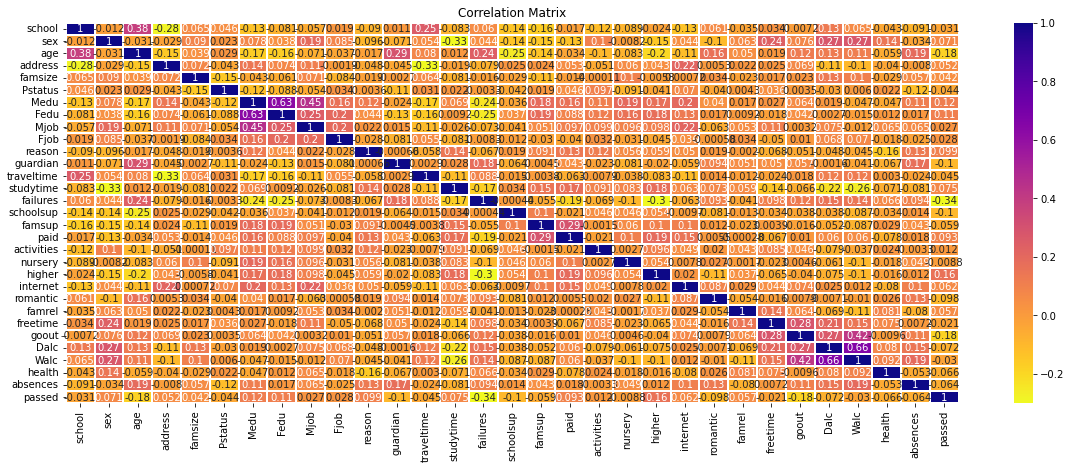

In [21]:
plt.figure(figsize=(20,7))
sns.heatmap(cor,vmin=-.3,vmax=1,linewidths=0.2,cmap='plasma_r',annot=True)
plt.title("Correlation Matrix")

In [22]:
x["Total_alcohol"]=x["Dalc"]+x["Walc"]
x["Avg_alcohol_consumption"]=(x["Dalc"]+x["Walc"]).mean()
x.drop(['school','address','guardian'],axis=1,inplace=True)
x.head()

,sex,age,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,traveltime,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,Total_alcohol,Avg_alcohol_consumption
0,0,18,0,0,4,4.0,0,4,0,2.0,...,0,4.0,3.0,4,1.0,1,3,6,2.0,3.726582
1,0,17,0,1,1,1.0,0,2,0,1.0,...,0,5.0,3.0,3,1.0,1,3,4,2.0,3.726582
2,0,15,1,1,1,1.0,0,2,2,1.0,...,0,4.0,3.0,2,2.0,3,3,10,5.0,3.726582
3,0,15,0,1,4,2.0,1,3,1,1.0,...,1,3.0,2.0,2,1.0,1,5,2,2.0,3.726582
4,0,16,0,1,3,3.0,2,2,1,1.0,...,0,4.0,3.0,2,1.0,2,5,4,3.0,3.726582


In [23]:
x.columns

Index(['sex', 'age', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob',
       'reason', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup',
       'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic',
       'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences',
       'Total_alcohol', 'Avg_alcohol_consumption'],
      dtype='object')

# Scale down the values

In [24]:
std=StandardScaler()
x=std.fit_transform(x)
x=pd.DataFrame(x,columns=['sex', 'age', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob',
       'reason', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup',
       'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic',
       'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences',
       'Total_alcohol', 'Avg_alcohol_consumption'])

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train.shape

(316, 29)

In [26]:
x_test.shape

(79, 29)

In [27]:
y_train.shape

(316,)

In [28]:
y_test.shape

(79,)

# Model

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
rdm=RandomForestClassifier()
rdm.fit(x_train,y_train)
y_pred=rdm.predict(x_test)
print("f1_score of the Model:",f1_score(y_pred, y_test))

f1_score of the Model: 0.7868852459016394


In [30]:
confusion_matrix(y_pred, y_test)

array([[ 5,  4],
       [22, 48]], dtype=int64)

In [31]:
x_test

,sex,age,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,traveltime,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,Total_alcohol,Avg_alcohol_consumption
78,1.054656,0.242187,-0.636941,0.340322,-0.685387,-1.409181,-0.138362,-0.325831,-0.211896,0.848677,...,-0.708450,0.003300,1.835554,-1.896683,-0.588026,-1.003789,-0.399289,-0.560438,-0.928464,8.881784e-16
371,1.054656,1.032798,1.570004,0.340322,-1.600009,-0.484552,-1.769793,0.833659,0.616806,2.358710,...,1.411533,0.003300,-0.273664,-0.097908,0.762383,0.551100,-0.399289,-0.384605,0.684776,8.881784e-16
248,1.054656,1.032798,1.570004,0.340322,0.229234,0.440077,-0.138362,0.833659,-1.040599,-0.661356,...,1.411533,0.003300,-0.273664,-0.097908,-0.588026,0.551100,1.041070,0.494556,0.147030,8.881784e-16
55,-0.948176,-0.548424,-0.636941,-2.938392,-0.685387,-1.409181,-0.138362,-0.325831,0.616806,-0.661356,...,1.411533,1.306735,-0.273664,0.801479,-0.588026,-1.003789,-1.119469,0.494556,-0.928464,8.881784e-16
390,1.054656,2.614019,1.570004,-2.938392,-0.685387,-0.484552,0.677354,0.833659,-1.040599,-0.661356,...,-0.708450,1.306735,1.835554,0.801479,2.787998,2.105989,0.320890,1.022053,2.566890,8.881784e-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364,-0.948176,0.242187,-0.636941,0.340322,-1.600009,-0.484552,-0.138362,0.833659,-1.040599,0.848677,...,-0.708450,-1.300135,-1.328273,-0.997295,-0.588026,-0.226345,-0.399289,-0.912102,-0.390717,8.881784e-16
82,-0.948176,-1.339034,1.570004,0.340322,0.229234,-0.484552,0.677354,-0.325831,1.445509,-0.661356,...,-0.708450,0.003300,0.780945,0.801479,-0.588026,-1.003789,1.041070,0.846221,-0.928464,8.881784e-16
114,1.054656,-1.339034,-0.636941,0.340322,-0.685387,-1.409181,-0.954077,0.833659,1.445509,-0.661356,...,1.411533,1.306735,0.780945,-0.997295,-0.588026,-1.003789,1.041070,0.494556,-0.928464,8.881784e-16
3,-0.948176,-1.339034,-0.636941,0.340322,1.143856,-0.484552,-0.954077,0.833659,-0.211896,-0.661356,...,1.411533,-1.300135,-1.328273,-0.997295,-0.588026,-1.003789,1.041070,-0.560438,-0.928464,8.881784e-16


In [32]:
#Checking feature imporatnce
pd.Series(rdm.feature_importances_, index=x.columns).sort_values(ascending=False)*100

absences                   9.685528
failures                   7.793221
age                        6.714970
goout                      5.092684
health                     4.683755
Mjob                       4.620593
Medu                       4.600058
Fedu                       4.582048
Total_alcohol              4.378418
freetime                   4.370885
famrel                     4.135546
studytime                  3.924030
Fjob                       3.543327
reason                     3.543198
Walc                       3.401004
paid                       2.604257
Dalc                       2.476446
traveltime                 2.436043
schoolsup                  2.337397
romantic                   2.004880
famsup                     1.827728
activities                 1.759858
sex                        1.715356
nursery                    1.708240
famsize                    1.707999
higher                     1.669311
internet                   1.615690
Pstatus                    1

In [ ]:
#droping the feature with low feature imporatnce
x.drop(["higher","famsup","nursery","activities","romantic","internet","Pstatus","Avg_alcohol_consumption"], axis=1, inplace=True)

In [36]:
#Evaluating the MOdel
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
rdm.fit(x_train,y_train)
y_pred=rdm.predict(x_test)
print("f1_score of the Model:",f1_score(y_pred, y_test))

f1_score of the Model: 0.8448275862068965


In [37]:
#We can use this model since f1 score is 0.84